# Homework 1 - Reading in 3 Data Types / Understanding Data

##### This is my very beginning step setting me up for the rest of the project. I import the libraries I need and rename some of them for ease of use later in the code.

In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
FRED_API_KEY = "4a83190230adbf01f44c64dace979011"
from fredapi import Fred
fred = Fred(FRED_API_KEY)

### This is the first dataset I am reading in. I am using a csv. I first change my current working directory to the Machine Learning folder on my computer. Then I read in the data from the googleplaystore csv file and name it df_google. I finally print out the first 10 lines using the ".head()" function.

In [2]:
os.chdir('C:\\Users\Ryan Gardner\Machine Learning')
df_google = pd.read_csv('googleplaystore.csv')
df_google

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


### After looking at the data we can see that "Genres" is super similar to "Category" but "Genres" has some extra categories tacked on the end and using the "Category" variable seems like it would be a lot cleaner. So I am going to drop the "Genre" variable in the next cell below. 

In [3]:
df_google = df_google.drop('Genres', axis = 1)

### Now when I look at the ratings it looks a little messy. Giving everything a rating out of 5 stars seems like an inefficient scoring scale to use in our data analysis. I would rather have it in percentage form, like a grade scale. That seems like a much easier way to understand the metric "Rating". So in the next cell I am going to multiply all the ratings by 20. If you were to multipy a perfect "5-Star" rating by 20 you would get a "100%" score so this is how I am converting the "Ratings" into percentages. 

In [4]:
df_google['Rating'] = df_google['Rating']*20

### Now when we print off the first 5 elements of the dataframe we can see the changes that were implemented and how the data seems much more clean than it was. 

In [5]:
df_google

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,82.0,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,78.0,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,94.0,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,90.0,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,86.0,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,88.0,167,5.6M,"50,000+",Free,0,Everyone,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,76.0,178,19M,"50,000+",Free,0,Everyone,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,82.0,36815,29M,"1,000,000+",Free,0,Everyone,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,88.0,13791,33M,"1,000,000+",Free,0,Everyone,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,94.0,121,3.1M,"10,000+",Free,0,Everyone,"July 3, 2018",2.8,4.0.3 and up


### I next proceed to rename the "Rating" column into a "Percent Rating" column to make it easier to understand exactly what is being rated and how. 

In [6]:
df_google = df_google.rename(columns={'Rating': 'Percent Rating'})

### Here after all manipulations we see the completed and cleaned dataset. Looks good. 

In [7]:
df_google

,App,Category,Percent Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,82.0,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,78.0,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,94.0,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,90.0,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,86.0,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,88.0,167,5.6M,"50,000+",Free,0,Everyone,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,76.0,178,19M,"50,000+",Free,0,Everyone,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,82.0,36815,29M,"1,000,000+",Free,0,Everyone,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,88.0,13791,33M,"1,000,000+",Free,0,Everyone,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,94.0,121,3.1M,"10,000+",Free,0,Everyone,"July 3, 2018",2.8,4.0.3 and up


### The question I wanted to answer is the question of does the number of Installs have any correlation with the Percent Rating that an app gets. We next plot the data to see if there are any visible relationships. 

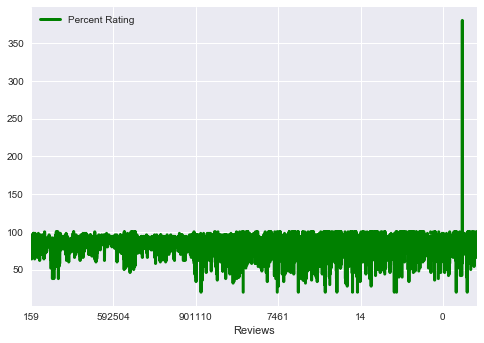

In [8]:
df_google.plot("Reviews","Percent Rating",color='green',linewidth=3, markersize=12)

### Now we are gonna work on a SQLite Database. The first commands here are to connect to the database and name is "conn" that stands for "Connected Database".

In [9]:
conn = sqlite3.connect("../Machine Learning/database.sqlite")

### This next line is to make a dataframe called "Emp_df" which means the employment dataframe. We then print it out. 

In [10]:
emp_df = pd.read_sql_query("select * from Salaries", conn)
emp_df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189083,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492,89062.9,134426,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256577,0,51322.5,,307899.46,307899.46,2011,,San Francisco,
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176933,86362.7,40132.2,,303427.55,303427.55,2011,,San Francisco,
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262,0,17115.7,,302377.73,302377.73,2011,,San Francisco,


### We then go in and drop a few variables that aren't important to us. We drop "Id", "Benefits", "TotalPayBenefits", and "Status". They are all irrelevant to the question we are hoping to answer.

In [11]:
emp_df.drop("Id", axis = 1)
emp_df.drop("Benefits", axis = 1)
emp_df.drop("TotalPayBenefits", axis = 1)
emp_df.drop("Status", axis = 1)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189083,,316285.74,316285.74,2011,,San Francisco
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492,89062.9,134426,,315981.05,315981.05,2011,,San Francisco
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256577,0,51322.5,,307899.46,307899.46,2011,,San Francisco
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176933,86362.7,40132.2,,303427.55,303427.55,2011,,San Francisco
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262,0,17115.7,,302377.73,302377.73,2011,,San Francisco


### This next cell is me listing off the different variables seeing if I misspelled the word "Benefits" because it refused to be removed after trying multiple times. 

In [12]:
list(emp_df.columns.values)

['Id',
 'EmployeeName',
 'JobTitle',
 'BasePay',
 'OvertimePay',
 'OtherPay',
 'Benefits',
 'TotalPay',
 'TotalPayBenefits',
 'Year',
 'Notes',
 'Agency',
 'Status']

### Here I print out the dataframe to see that I can't remove the "Benefits" part. Thats okay I guess. I've just got to let it be.

In [13]:
emp_df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189083,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492,89062.9,134426,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256577,0,51322.5,,307899.46,307899.46,2011,,San Francisco,
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176933,86362.7,40132.2,,303427.55,303427.55,2011,,San Francisco,
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262,0,17115.7,,302377.73,302377.73,2011,,San Francisco,


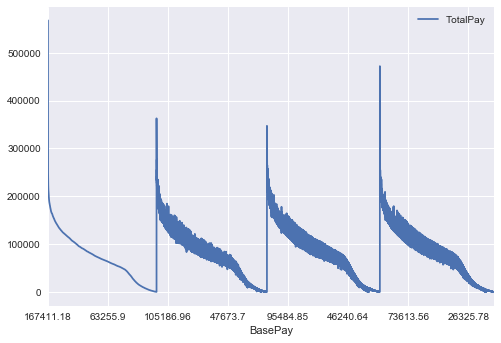

In [14]:
emp_df.plot(x="BasePay", y="TotalPay")

### We see that there are definitely different levels of income. Depending on base pay you will for sure have a different benefit level and bonus level.

### Now we are moving on to the data I collected by using the FRED API. I start by initializing my dataframe (named "df") as a dataframe of releases. Then I list off all the titles of the FRED releases i collected. 

In [15]:
df = fred.search_by_release(151)
df['title'].head(10)

series id
AKPCPI                    Per Capita Personal Income in Alaska
ALPCPI                   Per Capita Personal Income in Alabama
ARPCPI                  Per Capita Personal Income in Arkansas
AZPCPI                   Per Capita Personal Income in Arizona
BEAFWPCPI    Per Capita Personal Income in the Far West BEA...
BEAGLPCPI    Per Capita Personal Income in the Great Lakes ...
BEAMEPCPI    Per Capita Personal Income in the Mideast BEA ...
BEANEPCPI    Per Capita Personal Income in the New England ...
BEAPLPCPI    Per Capita Personal Income in the Plains BEA R...
BEARMPCPI    Per Capita Personal Income in the Rocky Mounta...
Name: title, dtype: object

### Next I proceed to make a new dataframe named "state_df" and I am electing to populate this "state_df" dataframe with only the titles from "df" that have a string that starts with the phrase "Per Capita Personal Income in the". Sorting all the titles found in "df" that start with this specific string allows me to pick only the personal income series data. I next iterate through the "state_df" and get all the data for the "income_by_state". 

In [16]:
state_df = df[~df['title'].str.startswith('Per Capita Personal Income in the')]
income_by_state = {}
for series_id in state_df.index:
    income_by_state[series_id[:2]] = fred.get_series(series_id)

### Here I am just printing out the state_df IDs and just the first two letters of the states names. Here we see that I have successfully gathered the states together. 

In [17]:
state_df.id.str[:2].head(5)

series id
AKPCPI    AK
ALPCPI    AL
ARPCPI    AR
AZPCPI    AZ
CAPCPI    CA
Name: id, dtype: object

### Next I am making a dataframe of "income_by_state" and iterating through the "state_df" to pick out the shorter state ID tags. 

In [18]:
income_by_state = {}
for series_id in state_df.index:
    income_by_state[series_id[:2]] = fred.get_series(series_id)

### The next thing we do here is to print out our dataframe populated with all the income data. We see that for a lot of the years these states haven't recorded any income. So after a little bit of trial and error I found that after 70 years of recording data they finally have consistent income data for all the states. This is the cutoff point I use to clean up my data just a bit later. 

In [19]:
income_by_state = pd.DataFrame(income_by_state)
income_by_state.head(70)

,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1929-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1931-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1932-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1933-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1935-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1936-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1937-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1938-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Here, as stated above, I am dropping the first 70 years of recorded data so that I can get consistent data for income for all the states. 

In [20]:
income_by_state.drop(income_by_state.index[:70])

,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1999-01-01,29776.0,23371.0,21920.0,24702.0,30699.0,31284.0,39622.0,31149.0,27649.0,27193.0,...,25445.0,26070.0,26349.0,23333.0,30568.0,26961.0,31042.0,27954.0,21130.0,27461.0
2000-01-01,31881.0,24372.0,22824.0,26151.0,33403.0,34027.0,43091.0,33862.0,29355.0,28783.0,...,26890.0,27276.0,28151.0,24531.0,32654.0,28915.0,32858.0,29573.0,22386.0,29363.0
2001-01-01,33425.0,25139.0,23917.0,26701.0,34083.0,34889.0,45247.0,36874.0,30300.0,29692.0,...,27682.0,27728.0,29332.0,25141.0,33916.0,30533.0,33258.0,30852.0,23786.0,30971.0
2002-01-01,34564.0,25706.0,24346.0,27043.0,34233.0,34466.0,44884.0,37621.0,30713.0,30044.0,...,27635.0,28298.0,29160.0,25399.0,34436.0,30991.0,33518.0,31436.0,24530.0,31448.0
2003-01-01,35765.0,26693.0,25588.0,28094.0,35452.0,34787.0,45199.0,37935.0,31646.0,30724.0,...,30010.0,29187.0,29768.0,25911.0,36104.0,32067.0,34545.0,32098.0,24759.0,33109.0
2004-01-01,36813.0,28399.0,26970.0,29954.0,37364.0,35722.0,47603.0,38873.0,33744.0,31869.0,...,31923.0,30577.0,30672.0,27152.0,38118.0,33818.0,36577.0,33354.0,25592.0,34977.0
2005-01-01,38817.0,29808.0,28096.0,32222.0,39326.0,37732.0,50110.0,39243.0,35962.0,33243.0,...,33598.0,31523.0,32799.0,29046.0,40216.0,34557.0,37592.0,34353.0,26828.0,38071.0
2006-01-01,40881.0,31306.0,29422.0,34667.0,42139.0,39997.0,54183.0,40995.0,38414.0,34609.0,...,35125.0,33040.0,35106.0,31454.0,42505.0,36830.0,40265.0,36297.0,28546.0,43192.0
2007-01-01,43676.0,32573.0,31062.0,35776.0,43669.0,41889.0,58122.0,41681.0,39545.0,35443.0,...,38579.0,34178.0,36583.0,33247.0,44289.0,38802.0,43125.0,37764.0,29551.0,44905.0
2008-01-01,47569.0,33377.0,31935.0,35543.0,43895.0,42492.0,61209.0,40768.0,39240.0,35113.0,...,40836.0,35020.0,39349.0,34009.0,45501.0,40645.0,44550.0,38914.0,31328.0,48227.0


### In the next cell I go ahead and create a plot for all the data of the states and give the plot a title. I title it "Per Captita Personal Income by State". This plot is the data from the "iloc[-1]" year. The first one back. 2017.

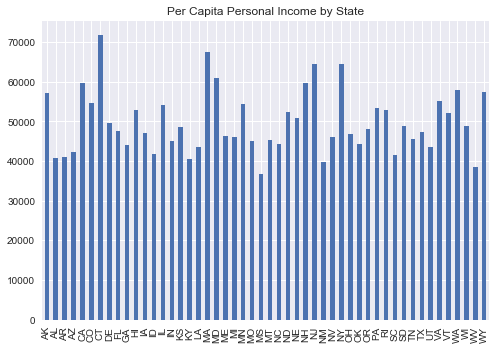

In [38]:
income_by_state.iloc[-1].plot(kind='bar')
plt.title('Per Capita Personal Income by State')